<a href="https://colab.research.google.com/github/RMLanders/devtraining-needit-istanbul/blob/master/Homework%203/landers_rachel_oth036_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3 - IS6733
## Rachel Landers 
OTH036

https://colab.research.google.com/drive/15bgdzm_EwWouoU_nZpB4EtHOIU8gcGsx?usp=sharing

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# Part 1
P1 (40pt):In the “Classifying movie reviews” example explained in Lecture 6, do the following experiments to see the new results(accuracy, loss, and training time)and summarize your observations. For simplicity, you can just always use the lecture example as the starting point when solving each subproblem. There is no need to change the parameters of each subproblem simultaneously.


In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
verbosity = 0
num_epochs = 4

In [ ]:
def plot_histories(history):
  acc = history.history['binary_accuracy']
  val_acc = history.history['val_binary_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)
  plt.figure()

  plt.subplot(121)
  # "bo" is for "blue dot"
  plt.plot(epochs, loss, 'bo', label='Training loss')
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(122)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

In [ ]:
def print_observations(history):
  print("binary_accuracy argmax is: {}".format(np.argmax(history.history['binary_accuracy'])))
  print("val_binary_accuracy is: {}".format(np.argmax(history.history['val_binary_accuracy'])))

## 1.1
1.Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.(10pt)

**Accuracy**: Both the 3 layer and 1 layer model increased accuracy.

**Loss**: Both the 3 layer and 1 layer model decreased loss.

**Training** **Time**: All three models hovered around 3 seconds total time though the 1 layer model had the smallest time with 2.96 seconds.

**Validation and Test Accuracy**:  Both the base model and the one layer models' validation accuracy peaks at the first epoch.  The three layer model peaks at the second.

### Base model

In [ ]:
# Lecture example
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
%%time
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=num_epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose = verbosity)

CPU times: user 4.09 s, sys: 680 ms, total: 4.77 s
Wall time: 3.41 s


In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.3578 - binary_accuracy: 0.8550
[0.3578307330608368, 0.8550400137901306]


binary_accuracy argmax is: 3
val_binary_accuracy is: 1


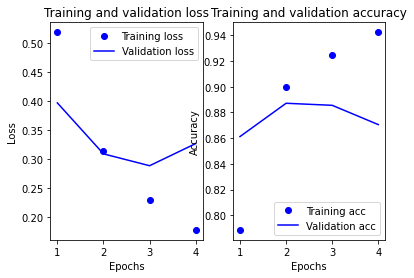

In [ ]:
print_observations(history)
plot_histories(history)

### Three layer model

In [ ]:
# 3 layers
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
%%time
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=num_epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose = verbosity)

CPU times: user 4.25 s, sys: 280 ms, total: 4.53 s
Wall time: 3.23 s


In [ ]:
results3 = model3.evaluate(x_test, y_test)
print(results3)

782/782 [==============================] - 2s 3ms/step - loss: 0.3064 - binary_accuracy: 0.8768
[0.30644744634628296, 0.8768399953842163]


binary_accuracy argmax is: 3
val_binary_accuracy is: 2


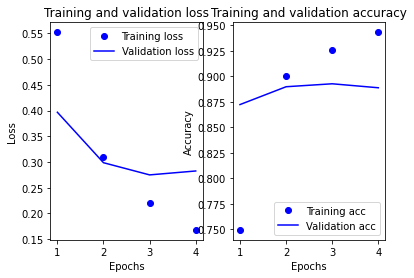

In [ ]:
print_observations(history3)
plot_histories(history3)

### One layer model

In [ ]:
# 1 layer
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
%%time
history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=num_epochs,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose = verbosity)

CPU times: user 4.14 s, sys: 133 ms, total: 4.28 s
Wall time: 2.96 s


In [ ]:
results1 = model1.evaluate(x_test, y_test)
print(results1)

782/782 [==============================] - 2s 2ms/step - loss: 0.3040 - binary_accuracy: 0.8764
[0.30400434136390686, 0.8763599991798401]


binary_accuracy argmax is: 3
val_binary_accuracy is: 1


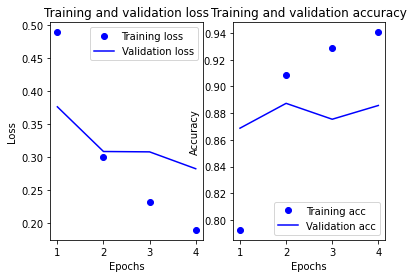

In [ ]:
print_observations(history1)
plot_histories(history1)

## 1.2
Try to use layers with more hidden units or less hidden units: 32 unitsand 64 units.(10pt)

**Accuracy**: The 64 unit model has the same accuracy as the base model.  The 32 unit model improves the accuracy.

**Loss**: The 64 unit model has the same loss as the base model. The 32 unit model improves the loss.

**Training Time**: The 64 unit model improves the time to train as does the 32 unit model.

### 32 unit model

In [ ]:
model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(32, activation='relu'))
model32.add(layers.Dense(1, activation='sigmoid'))

model32.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
%%time
history32 = model32.fit(partial_x_train,
            partial_y_train,
            epochs=num_epochs,
            batch_size=512,
            validation_data=(x_val, y_val),
            verbose = verbosity)

CPU times: user 4.11 s, sys: 411 ms, total: 4.52 s
Wall time: 3.23 s


In [ ]:
results32 = model32.evaluate(x_test, y_test)
print(results32)

782/782 [==============================] - 2s 2ms/step - loss: 0.3035 - binary_accuracy: 0.8789
[0.30345606803894043, 0.8788800239562988]


binary_accuracy argmax is: 3
val_binary_accuracy is: 1


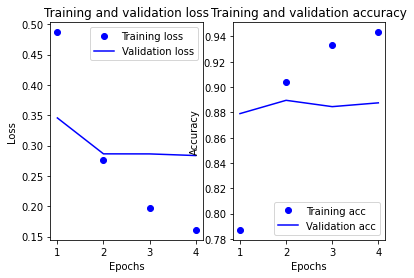

In [ ]:
print_observations(history32)
plot_histories(history32)

### 64 unit model

In [ ]:
model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model64.add(layers.Dense(64, activation='relu'))
model64.add(layers.Dense(1, activation='sigmoid'))

model64.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
%%time
history64 = model64.fit(partial_x_train,
            partial_y_train,
            epochs=num_epochs,
            batch_size=512,
            validation_data=(x_val, y_val),
            verbose = verbosity)

CPU times: user 4.07 s, sys: 113 ms, total: 4.18 s
Wall time: 2.97 s


In [ ]:
results64 = model.evaluate(x_test, y_test)
print(results64)

782/782 [==============================] - 2s 2ms/step - loss: 0.3578 - binary_accuracy: 0.8550
[0.3578307330608368, 0.8550400137901306]


binary_accuracy argmax is: 3
val_binary_accuracy is: 2


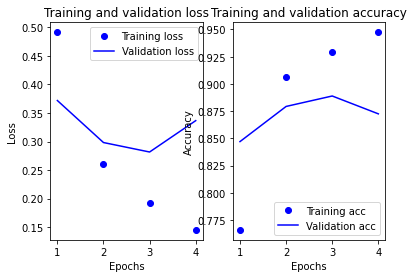

In [ ]:
print_observations(history64)
plot_histories(history64)

## 1.3
Try to use the mseloss function instead of binary_crossentropy.(10pt)

**Accuracy**: The mse model increased accuracy over the base model.

**Loss**: The mse model decreased loss by a large amount.

**Training Time**: The time to train decreased.

In [ ]:
modelmse = models.Sequential()
modelmse.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
modelmse.add(layers.Dense(16, activation='relu'))
modelmse.add(layers.Dense(1, activation='sigmoid'))

modelmse.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss=losses.mse,
                metrics=[metrics.binary_accuracy])

In [ ]:
%%time
historymse = modelmse.fit(partial_x_train,
                          partial_y_train,
                          epochs=num_epochs,
                          batch_size=512,
                          validation_data=(x_val, y_val),
                          verbose = verbosity)

CPU times: user 4.11 s, sys: 135 ms, total: 4.25 s
Wall time: 2.94 s


In [ ]:
resultsmse = modelmse.evaluate(x_test, y_test)
print(resultsmse)

782/782 [==============================] - 2s 2ms/step - loss: 0.0899 - binary_accuracy: 0.8796
[0.08990045636892319, 0.8795599937438965]


## 1.4
Try to use the tanh activation (an activation that was popular in the early days of neural networks) instead of relu.(10pt)

**Accuracy**: The tanh model increased accuracy over the base model.

**Loss**: The tanh model increased loss.

**Training Time**: The tanh model decreased time to fit.  

In [ ]:
modeltanh = models.Sequential()
modeltanh.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
modeltanh.add(layers.Dense(64, activation='tanh'))
modeltanh.add(layers.Dense(1, activation='sigmoid'))

modeltanh.compile(optimizer=optimizers.RMSprop(lr=0.001),
                  loss=losses.binary_crossentropy,
                  metrics=[metrics.binary_accuracy])

In [ ]:
%%time
historytanh = modeltanh.fit(partial_x_train,
                            partial_y_train,
                            epochs=num_epochs,
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            verbose = verbosity)

CPU times: user 4.15 s, sys: 128 ms, total: 4.28 s
Wall time: 3.08 s


In [ ]:
resultstanh = modeltanh.evaluate(x_test, y_test)
print(resultstanh)

782/782 [==============================] - 2s 2ms/step - loss: 0.3716 - binary_accuracy: 0.8658
[0.3716157078742981, 0.8658400177955627]


# Problem #2
P2(60pt):Write a Python code in Colab using NumPy, Panda, Scikit-Learn and Keras to complete the following tasks:

## 2.1
Import the Auto MPG dataset using pandas.read_csv(),use the attribute names as explained in the dataset description as the column names (5pt), view the strings ‘?’ as the missing value, and whitespace (i.e., ‘\s+’) as the column delimiter. Print out the shape and first 5 rows of the DataFrame. (5pt)

a.Dataset source file: http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

b.Dataset description: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 na_values = '?',
                 sep = '\s+',
                 names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name', ])
print(df.shape)
df.head(5)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 2.2
Delete the “car_name” column using .drop()and drop the rows containing NULL valueusing .dropna().Print out the shape and first 5 rows of the DataFrame.(5pt)

In [ ]:
df = df.drop(columns=['car name'])
df = df.dropna()

print(df.shape)
df.head(5)

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## 2.3
For the ‘origin’ column with categorical attribute, replace it with the columns with numerical attributes using one-hot encoding. Print out the shape and first 5 rows of theDataFrame.(5pt)

In [ ]:
df = pd.get_dummies(df, columns=['origin'])
print(df.shape)
df.head(5)

(392, 10)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


## 2.4

Separate the “mpg” column from other columns and view it as the label vector and others as the feature matrix. Split the data into a training set (80%) and testing set (20%) using train_test_split and print out their shapes. (5pt)

In [ ]:
X_col = df.columns.drop('mpg')
X = df[X_col].values
y = df['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((313, 9), (79, 9), (313,), (79,))

## 2.5

Use the StandardScalar() in Scikit-Learn to normalize the feature matrices of both training set and testing set. Note that the testing set can only be scaled by the mean and standard deviation values obtained from the training set.(5pt)

In [ ]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

## 2.6

Build a SequentialNN model in Keras with two densely connected hidden layers (32 neurons and ReLU activation function for each hidden layer), and an output layer that returns a single, continuous value. Print out the model summary using .summary().(10pt)

In [ ]:
auto_model = models.Sequential()
auto_model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
auto_model.add(layers.Dense(32, activation='relu'))
auto_model.add(layers.Dense(1))
auto_model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 32)                320       
_________________________________________________________________
dense_73 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 33        
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________


## 2.7

Define the appropriate loss function, optimizer, and metrics for this specific problem and compile the NN model. (10pt)

In [ ]:
auto_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

## 2.8

Put aside 20% of the training data as the validation dataset and set verbose = 0 to compress the model training status in Keras.fit().Train the NN model for 500 epochs and plot the training and validation loss progresses with respect to the epoch number. (10pt)

In [ ]:
len_val = round(.2*len(X_train))

x_val = X_train[:len_val]
partial_x_train = X_train[len_val:]

y_val = y_train[:len_val]
partial_y_train = y_train[len_val:]

(partial_x_train.shape, partial_y_train.shape, x_val.shape, y_val.shape)

((250, 9), (250,), (63, 9), (63,))

In [ ]:
history = auto_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=500,
                    validation_data=(x_val, y_val),
                    verbose = 0)

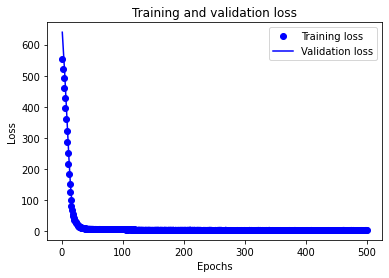

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

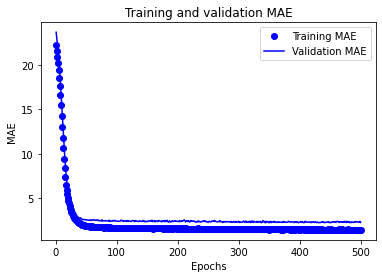

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, mae, 'bo', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

## 2.9

Use the trained NN model to make predictions on the testing dataset and observe the prediction error. (5pt)

In [ ]:
test_mse_score, test_mae_score = auto_model.evaluate(X_test, y_test)
test_mae_score

3/3 [==============================] - 0s 2ms/step - loss: 8.8462 - mae: 2.0299


2.0299084186553955